In [1]:
import warnings
warnings.simplefilter('ignore')

from complexity_analysis import plot_S_K_experiment

## Developing plots for complexity paper

There seems to be a lot of noise in the averages and even medians, as shown below.

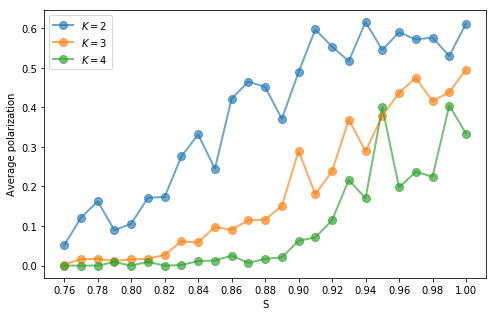

In [2]:
plot_S_K_experiment('data/ic_k234', figsize=(7, 4.5), plot_start=1)
plt.xticks(plt.xticks()[0][::2], 
           ['{:.2f}'.format(el) for el in np.arange(.76, 1.03, .02)]);

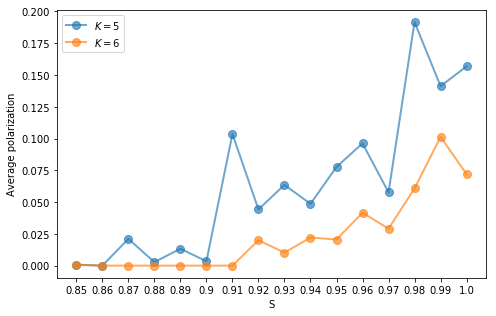

In [3]:
plot_S_K_experiment('data/ic_k56', figsize=(7, 4.5))

And on to the medians...

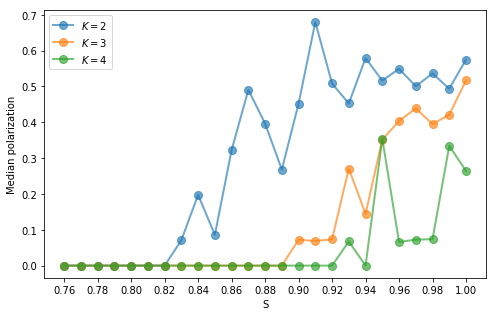

In [4]:
plot_S_K_experiment('data/ic_k234', figsize=(7, 4.5), agg_fun=np.median, plot_start=1)
plt.xticks(plt.xticks()[0][::2], 
           ['{:.2f}'.format(el) for el in np.arange(.76, 1.03, .02)]);

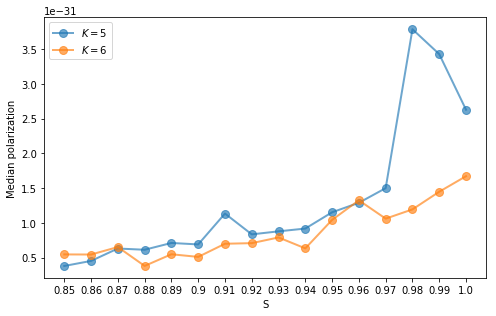

In [5]:
plot_S_K_experiment('data/ic_k56', figsize=(7, 4.5), agg_fun=np.median)

We need to take a closer look at when polarization does emerge for these parameterizations. Where could randomness in final polarization come from? The first thought would be to check the random graph structure. Perhaps in higher dimensions, there are fewer configurations.

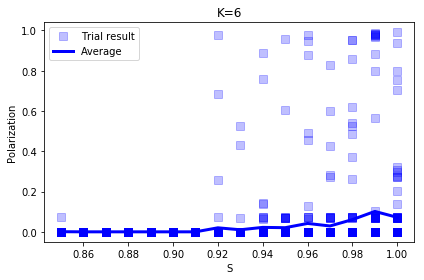

In [6]:
from complexity_analysis import (
    _all_final_polarizations, _final_mean, _hdf_list
)

# Get HDFs for all S and a single K
K = 6
hdfs = _hdf_list('data/ic_k56')
hdfs_K = [hdf for hdf in hdfs if hdf.attrs['K'] == K]
hdfs_K.sort(key=lambda x: x.attrs['S'])
hdf0 = hdfs_K[0]
n_trials = len(_all_final_polarizations(hdf0))
S_vals = [hdf.attrs['S'] for hdf in hdfs_K]
for idx, hdf in enumerate(hdfs_K):
    if idx == 0:
        plt.plot([S_vals[idx]]*n_trials, _all_final_polarizations(hdf), 
                     's', color='blue', ms=8, alpha=0.25,
                label='Trial result')
    else:
        plt.plot([S_vals[idx]]*n_trials, _all_final_polarizations(hdf), 
                     's', color='blue', ms=8, alpha=0.25)

means = [_final_mean(hdf) for hdf in hdfs_K]    

plt.plot(S_vals, means, color='blue', marker=None, lw=3, label='Average')
plt.ylabel('Polarization')
plt.xlabel('S')
plt.legend()
plt.title('K=6');

Now try a semilog y-axis to see clustering of runs a little better.

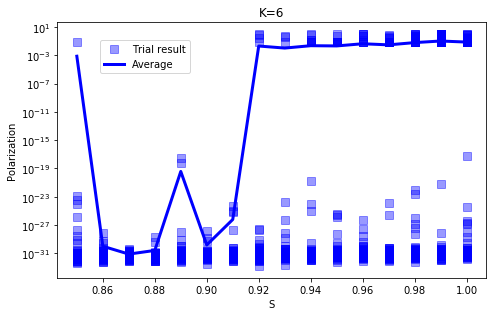

In [7]:
plt.figure(figsize=(7, 4.5))
for idx, hdf in enumerate(hdfs_K):
    if idx == 0:
        plt.semilogy([S_vals[idx]]*n_trials, _all_final_polarizations(hdf), 
                     's', color='blue', ms=8, alpha=0.4,
                label='Trial result')
    else:
        plt.semilogy([S_vals[idx]]*n_trials, _all_final_polarizations(hdf), 
                     's', color='blue', ms=8, alpha=0.4)

means = [_final_mean(hdf) for hdf in hdfs_K]    

plt.semilogy(S_vals, means, color='blue', marker=None, lw=3, label='Average')
plt.ylabel('Polarization')
plt.xlabel('S')
plt.legend(loc=(.1, .8))
plt.title('K=6');

Both of these are interesting. Wrap them up in a function that can plot either one or many for different values of $K$ in separate subplots. Have a switch to specify the `plot_fun`.

This is now done in `plot_single_S_K`, shown below.

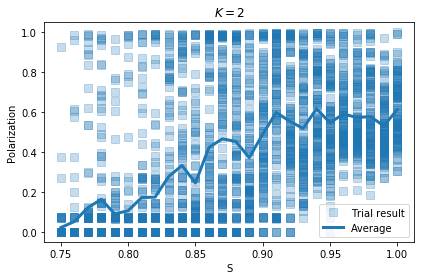

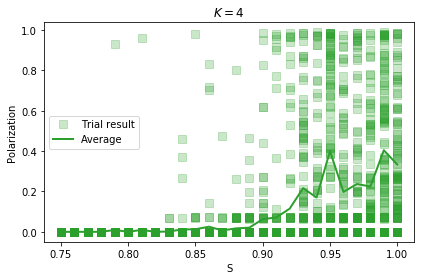

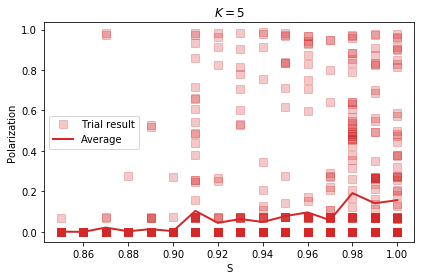

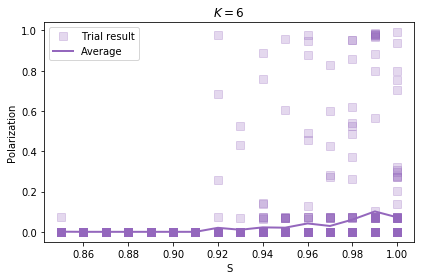

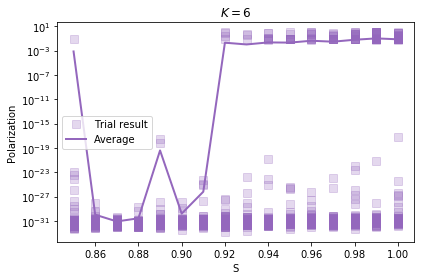

In [8]:
from complexity_analysis import plot_single_S_K

plot_single_S_K('data/ic_k234', 2, lw=3)
plot_single_S_K('data/ic_k234', 4)
plot_single_S_K('data/ic_k56', 5)
plot_single_S_K('data/ic_k56', 6)
plot_single_S_K('data/ic_k56', 6, semilogy=True)
# Uncomment to save one of these to file test.pdf
# plot_single_S_K('data/ic_k56', 6, save_path='test.pdf')

Seems to be working well. We want to analyze the variation between runs. However, it'd be good to look at P vs. S for all trials even if they don't have the same number of data points on the x-axis. $K=2,3$ and $4$ all went from .75 to 1.0, but $K=5,6$ start from $S=.85$.

Let's try to get that working.

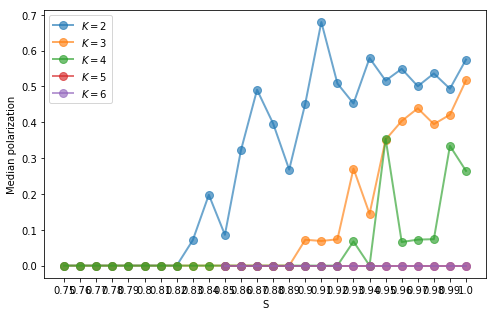

In [9]:
plot_S_K_experiment(['data/ic_k234', 'data/ic_k56'], figsize=(7, 4.5), agg_fun=np.median)

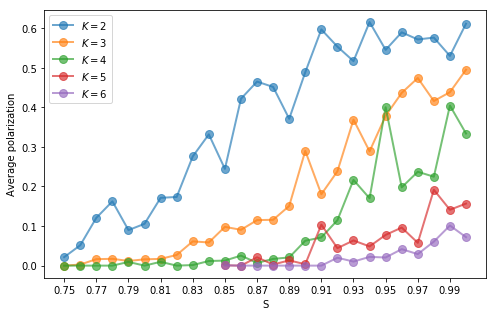

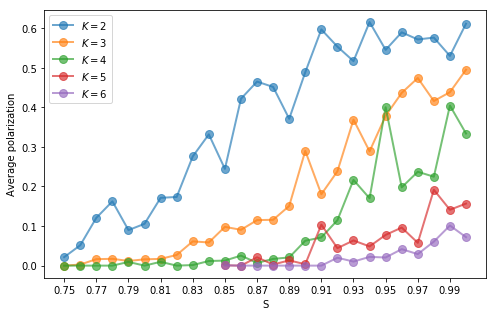

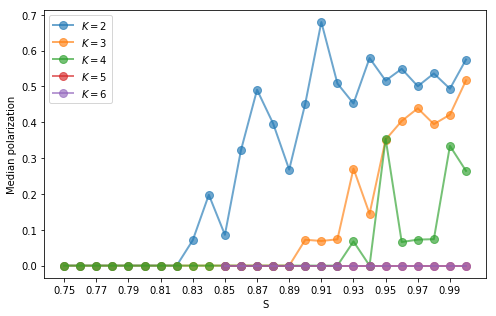

In [10]:
plot_S_K_experiment(['data/ic_k234', 'data/ic_k56'], figsize=(7, 4.5), 
                    agg_fun=np.mean, lim_xticks=True)
# Uncomment below to persist figures
plot_S_K_experiment(['data/ic_k234', 'data/ic_k56'], figsize=(7, 4.5), lim_xticks=True,
                    agg_fun=np.mean, save_path='reports/Figures/s_k_zoom_2-6_mean.pdf')
plot_S_K_experiment(['data/ic_k234', 'data/ic_k56'], figsize=(7, 4.5), agg_fun=np.median, 
                    lim_xticks=True, save_path='reports/Figures/s_k_zoom_2-6_median.pdf')

## Explaining variation in final polarization

We have discovered something interesting that I wonder if Flache and Macy were aware of, but did not pursue further. That is, why is there so much variance in the final polarization outcomes? The averages are not so much a measure of the most common behavior, but a statistical reading of how often non-zero polarizations emerge and how large, on average, these non-zero polarizations are. 

See Figure 12b below from Flache and Macy (2011). I reproduced this figure, but did not explore the variance yet in my reproduction. I should do that first. Then I want to set up the machinery to re-use the initial conditions and random network structure and re-run some trials keeping these the same on every run. If polarization remains high, we can rule out path dependence of the random, asynchronous updating of opinions.

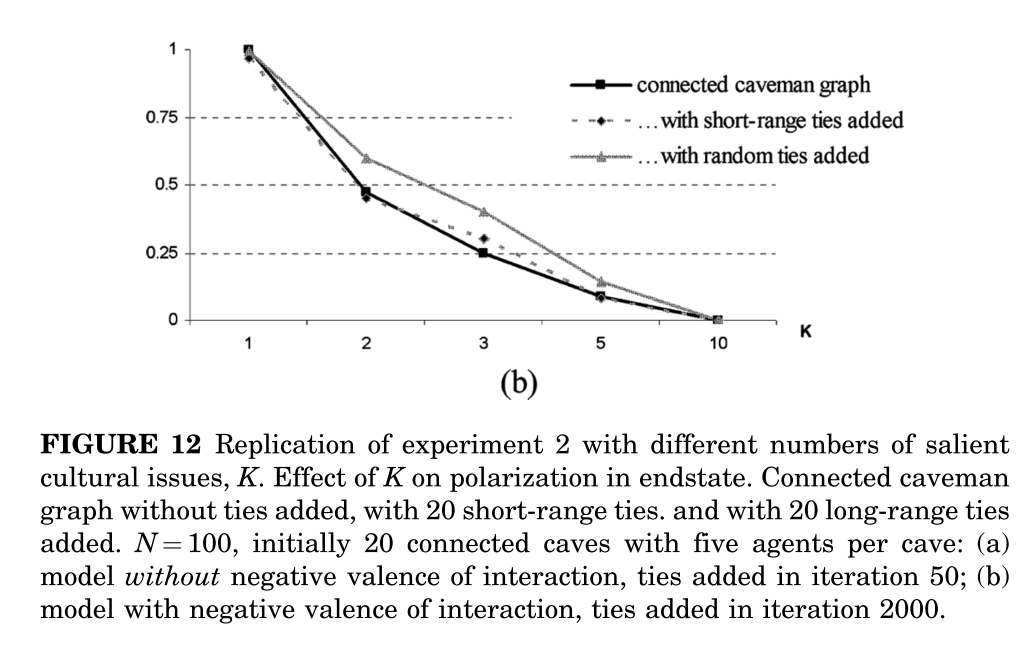


I made this same plot.

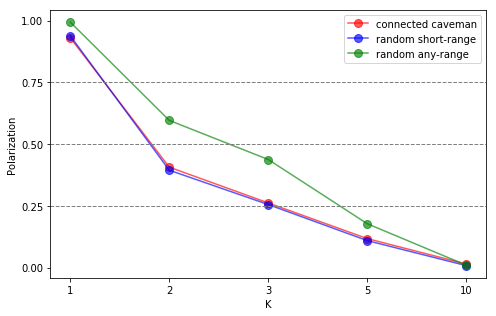

In [55]:
from complexity_analysis import plot_figure12b
plot_figure12b('data/finegrained_K_4-18/', stddev='off', 
               full_ylim=True, x=[1, 2, 3, 5, 10], figsize=(7, 4.5),
              save_path='reports/Figures/p_vs_K_fm.pdf')

I ran this for more values of $K$ just to see more of the trend. This particular experiment used 50 trials.

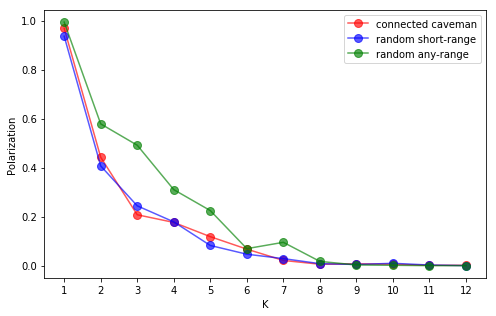

In [12]:
from complexity_analysis import plot_figure12b
plot_figure12b('data/finegrained_K_fm', stddev='off', 
               full_ylim=False, x=list(range(1, 13)), 
               figsize=(7, 4.5))

But for now, let's just explore how much variation there is between runs in my figure above, which nearly matches the Flache and Macy (2011) one. The $K=3$ value looks a little different, but if they also encountered similar variation in final polarizaiton between trials, then on a different 50 trials they may have a plot that looked like mine.

Instead of plotting $S$ on the x-axis and average/median and single-trial outcome final polarization on the y-axis, I'll have $K$ on the x-axis. Single-trial and average/median outcomes will still be on the y-axis. I will only plot it for one of the experiments.

Text(0.5,1,'Average and trial polarization for connected caveman')

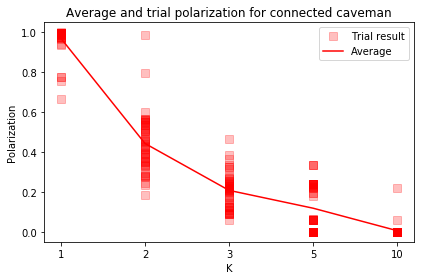

In [13]:
from complexity_analysis import (
    _all_final_polarizations, _hdf_list, _final_mean
)
hdfs = _hdf_list('data/finegrained_K_fm')

x = [1, 2, 3, 5, 10]
hdfs.sort(key=lambda x: x.attrs['K'])
hdfs_lim = [hdf for hdf in hdfs if hdf.attrs['K'] in x]

final_polarizations_cc = [
    _all_final_polarizations(hdf, experiment='connected caveman')
    for hdf in hdfs_lim
]

n_trials = len(final_polarizations_cc[0])

for x_idx, K in enumerate(x):
    if x_idx == 0:
        plt.plot([x_idx]*n_trials, final_polarizations_cc[x_idx], 
                 marker='s', ms=8, alpha=0.25, lw=0,
                 color='r', label='Trial result')
    else:
        plt.plot([x_idx]*n_trials, final_polarizations_cc[x_idx],
                 marker='s', ms=8, alpha=0.25, lw=0,
                 color='r')

means = [_final_mean(hdf, experiment='connected caveman') 
         for hdf in hdfs_lim]
plt.plot(means, color='red', marker=None, label='Average')

plt.xticks(range(len(x)), [str(el) for el in x])
plt.legend(loc='best')
plt.xlabel('K')
plt.ylabel('Polarization')
plt.title('Average and trial polarization for connected caveman')

OK, now to try the encapsulated version.

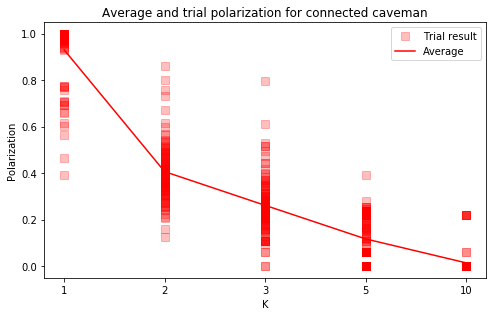

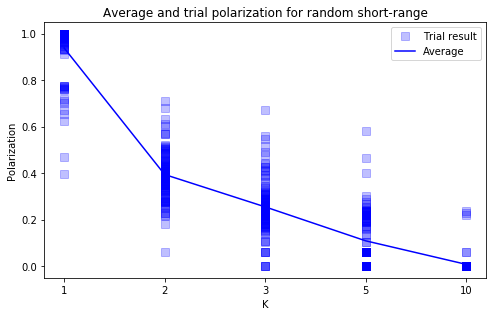

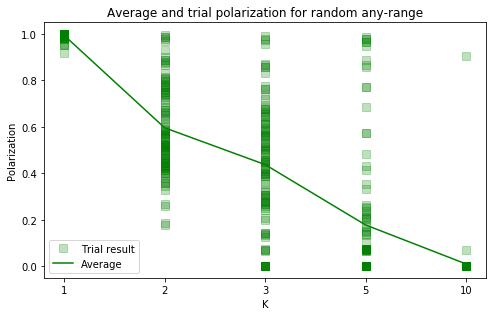

In [56]:
from complexity_analysis import plot_single_K_experiment

plot_single_K_experiment('data/finegrained_K_4-18/', 'connected caveman', figsize=(7, 4.5),
                         save_path='reports/Figures/connected-caveman-over-K.pdf')
plot_single_K_experiment('data/finegrained_K_4-18', 'random short-range', figsize=(7, 4.5),
                         save_path='reports/Figures/random-shortrange-over-K.pdf')
plot_single_K_experiment('data/finegrained_K_4-18', 'random any-range', figsize=(7, 4.5),
                         save_path='reports/Figures/random-anyrange-over-K.pdf')

So we can see that these means do not give us insight into typical behavior. They are skewed towards more extreme final polarization values. The question I want to answer is, why do systems reach a higher final polarization value than another? Are agents going to various corners of opinion space, but in different numbers, when any non-zero polarization emerges? It's possible to calculate the different polarization values if all agents go in equal number to all corners, and all to two exaclty opposite corners. How maximally-distanced corners are there? That is, for
corners $v_i, v_j \in \mathbf{R}^{K}$, how many corners are there such that $<v_i, v_j>/K = -1$? Note each corner vector has length $\sqrt{K}$, so the product of two corner vectors' norms is $K$. 

From changing K around, it is $2^{K-1}$, which I expected. But, how to prove it?

In [15]:
# get all corners in K dims
import itertools
from numpy import inner, sqrt, unique
K = 3
corners = list(itertools.product([-1, 1], repeat=K))
# print(corners)

opposing_corners = []
for c1 in corners:
    for c2 in corners:
        ip = inner(c1, c2)
        
        if ip == -K and (c2, c1) not in opposing_corners:
            opposing_corners.append((c1, c2))
            
print(opposing_corners)
print(len(opposing_corners))

[((-1, -1, -1), (1, 1, 1)), ((-1, -1, 1), (1, 1, -1)), ((-1, 1, -1), (1, -1, 1)), ((-1, 1, 1), (1, -1, -1))]
4


Another question I have is, although the expected value of distances under the uniform distribution is constant with $K$ for $d_{ij}$ as defined by Flache and Macy (2011), is the variation of distances also constant with increasing $K$? 

I'll do that calculation later. For now, I want to push the computational experiment further by running new simulations with the same initial conditions and network randomization. If high levels of polarization still obtain, we can tentatively conclude that the "update path" does not affect the final polarization. Then it is either the initial conditions or the random network structure, or potentially some of each.

Step one is to look up an HDF with a high polarization for a given $K$ (and eventually $S$). For now, I will start with $S=1.0$ and $K=2$ for simplicity. I'm wary of this actually working. Specifically the part where the same random graph is used. So, instead of doing that, I will start with $K=2$ and the connected caveman graph. In the plot above, one of the runs finished with a final polarization of nearly 1. This suggests it was a matter of extreme initial conditions or because of the path. It suggests that network structure can be overcome no matter what it is.

12


['final coords', 'graph', 'polarization']

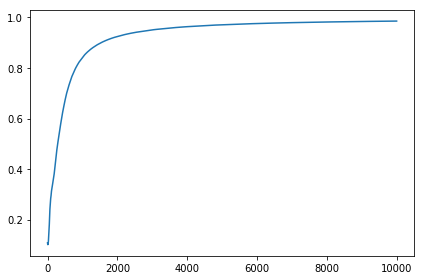

In [16]:
from complexity_analysis import _lookup_hdf
hdf = _lookup_hdf('data/finegrained_K_fm', K=2)
cc = hdf['connected caveman']
max_trial_idx = np.argmax(cc['polarization'][:, -1])
print(max_trial_idx)
plt.plot(cc['polarization'][max_trial_idx])
list(cc.keys())

OK, so unfortunately I was not syncing the coordinates when I ran these experiments. So, I will re-run K=2 on the cluster. Single job, should be done, and I expect there will be at least one or two out of 100 that achieve high levels of polarization even in the connected caveman case.

_Later_ jobs finished for finegrained P vs. K for the different experiments. First run only had up to $K=8$. Let's see the results.

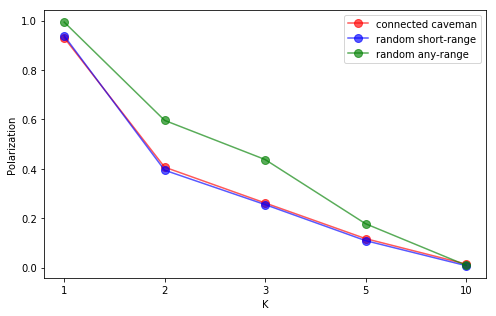

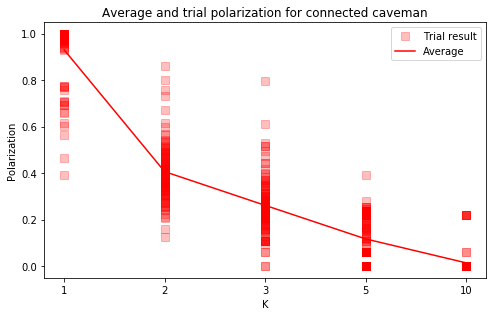

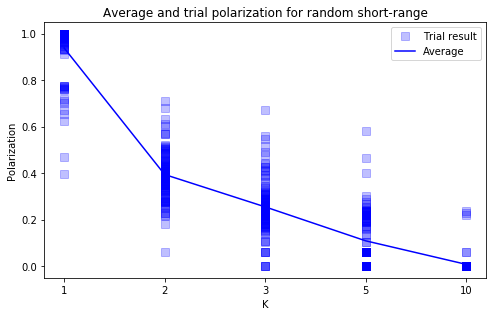

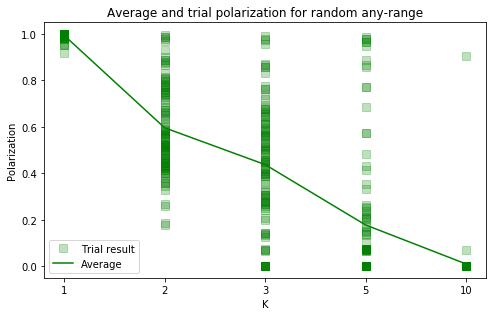

In [17]:
plot_figure12b('data/finegrained_K_4-18/', stddev='off', x=[1, 2, 3, 5, 10],
               full_ylim=False,  # x=list(range(1, 13)), 
               figsize=(7, 4.5), save_path)

plot_single_K_experiment('data/finegrained_K_4-18/', 'connected caveman', 
                         x=[ 1, 2, 3, 5, 10], figsize=(7, 4.5))
plot_single_K_experiment('data/finegrained_K_4-18', 'random short-range', 
                         x=[1, 2, 3, 5, 10], figsize=(7, 4.5))
plot_single_K_experiment('data/finegrained_K_4-18/', 'random any-range', 
                         x=[1, 2, 3, 5, 10], figsize=(7, 4.5))

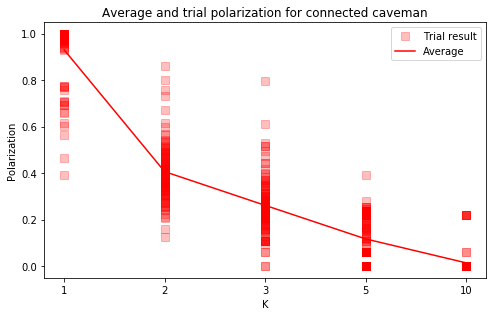

In [18]:
from complexity_analysis import plot_single_K_experiment
plot_single_K_experiment('data/finegrained_K_4-18/', 'connected caveman', 
                         x=[ 1, 2, 3, 5, 10], figsize=(7, 4.5), 
                         save_path='/Users/mt/Desktop/connected-caveman-over-K.pdf')

Repeat an above step to find the largest polarization for the connected caveman experiment from the updated finegrained data.

91
0.8607975601490361
Mean for K=2: 0.4065934104059067


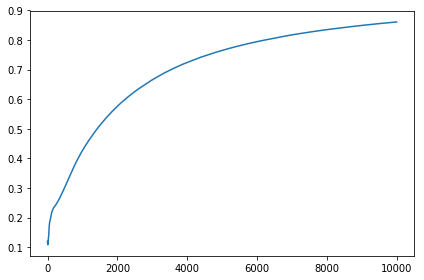

In [58]:
from complexity_analysis import _lookup_hdf
hdf = _lookup_hdf('data/finegrained_K_4-18', K=2)
cc = hdf['connected caveman']
max_trial_idx = np.argmax(cc['polarization'][:, -1])
print(max_trial_idx)
plt.plot(cc['polarization'][max_trial_idx])
list(cc.keys())
print(np.max(cc['polarization'][:, -1]))
print('Mean for K=2: {}'.format(cc['polarization'][:, -1].mean()))

91


0.11965937948188639

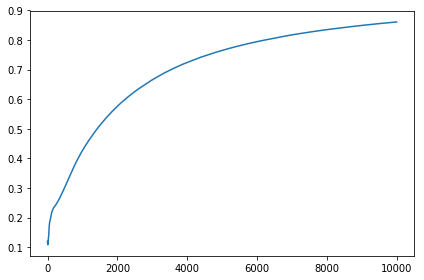

In [34]:
from complexity_analysis import _lookup_hdf
hdf = _lookup_hdf('data/finegrained_K_4-18', K=2)
cc = hdf['connected caveman']
max_trial_idx = np.argmax(cc['polarization'][:, -1])
print(max_trial_idx)
plt.plot(cc['polarization'][max_trial_idx])
list(cc.keys())

initial_pols = cc['polarization'][:, 0]
final_pols = cc['polarization'][:, -1]
initial_pols[max_trial_idx]

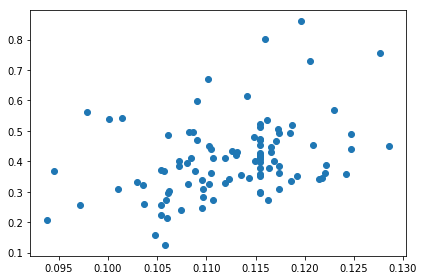

In [35]:
plt.plot(initial_pols, final_pols, 'o')

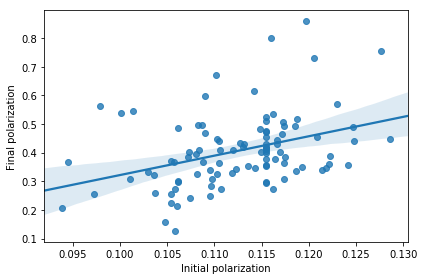

In [36]:
import seaborn as sns
sns.regplot(x=initial_pols, y=final_pols)
plt.ylabel('Final polarization')
plt.xlabel('Initial polarization')
plt.savefig('/Users/mt/Desktop/final-initial-pol-regplot.pdf')

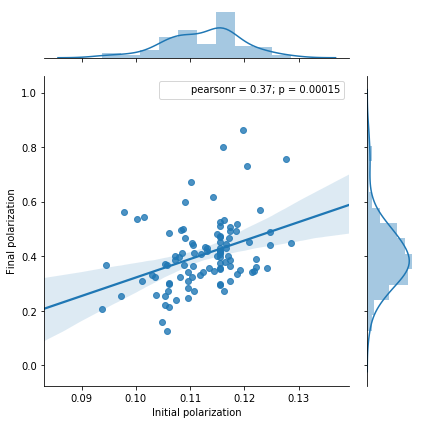

In [37]:
import seaborn as sns
# sns.set(color_codes=False)
sns.jointplot(x=initial_pols, y=final_pols, kind="reg")
plt.xlabel('Initial polarization')
plt.ylabel('Final polarization')
plt.savefig('reports/Figures/final-initial-pol-regplot.pdf')

0.11249373158741527

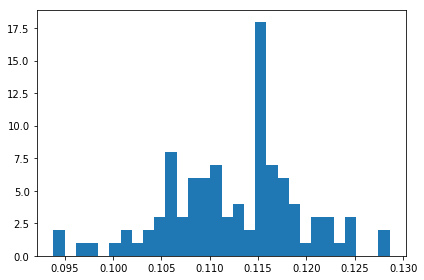

In [24]:
plt.hist(initial_pols, bins=30)
np.mean(initial_pols)

0.11059807431074299
0.11001655783605611


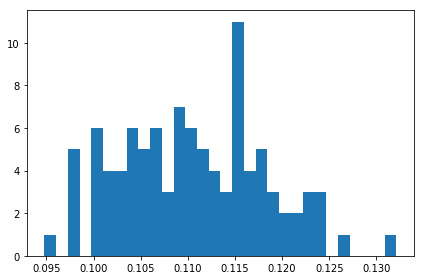

In [25]:
sr = hdf['random short-range']
initial_pols = sr['polarization'][:, 0]
plt.hist(initial_pols, bins=30)
print(np.mean(initial_pols))
print(np.median(initial_pols))

In [26]:
srcoords = sr['coords']
srcoords.shape

(100, 51, 100, 2)

In [27]:
init_srcoords = sr['coords'][:, 0]

In [28]:
init_srcoords.shape

(100, 100, 2)

In [29]:
np.mean(init_srcoords)

0.004465655707835339

(array([1984., 1929., 2058., 2006., 1973., 1984., 1952., 2012., 2124.,
        1978.]),
 array([-9.99465246e-01, -7.99562596e-01, -5.99659947e-01, -3.99757297e-01,
        -1.99854647e-01,  4.80021886e-05,  1.99950652e-01,  3.99853301e-01,
         5.99755951e-01,  7.99658601e-01,  9.99561250e-01]),
 <a list of 10 Patch objects>)

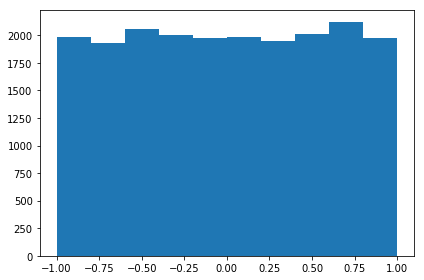

In [30]:
plt.hist(init_srcoords.reshape(100*100*2))

Is it to be expected that the expected polarization is about .11 for the uniform dist in 2d?

(array([2994., 3050., 3044., 3141., 2963., 3112., 2924., 3073., 2958.,
        2741.]),
 array([-9.99879465e-01, -7.99891601e-01, -5.99903738e-01, -3.99915874e-01,
        -1.99928011e-01,  5.98528233e-05,  2.00047716e-01,  4.00035580e-01,
         6.00023443e-01,  8.00011307e-01,  9.99999171e-01]),
 <a list of 10 Patch objects>)

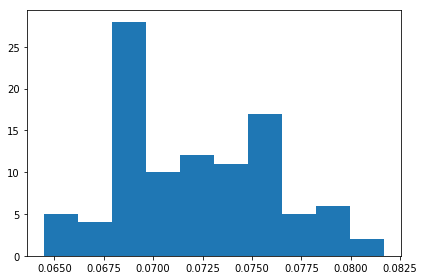

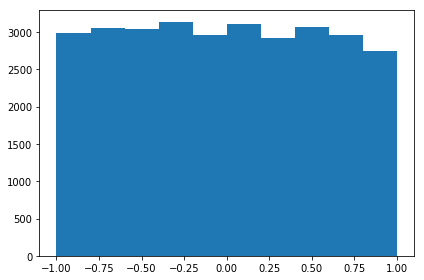

In [31]:
hdf = _lookup_hdf('data/finegrained_K_4-18', K=3)
cc = hdf['connected caveman']
initial_pols = cc['polarization'][:, 0]
final_pols = cc['polarization'][:, -1]
plt.hist(initial_pols)
plt.figure()
plt.hist(cc['coords'][:, 0].reshape(100*100*3))

So again we'll get the index corresponding to the largest final polarization. This can be passed to `ExperimentRerun` with the HDF to get a new experiment with identical initial conditions. Then I'll run the experiment five times and inspect the results.

91


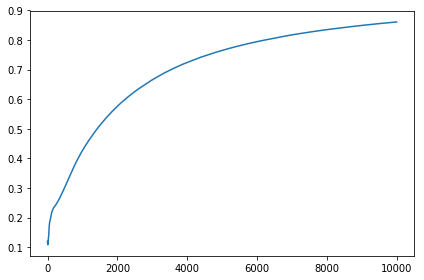

In [32]:
from complexity_analysis import _lookup_hdf
hdf = _lookup_hdf('data/finegrained_K_4-18', K=2)
cc = hdf['connected caveman']
max_trial_idx = np.argmax(cc['polarization'][:, -1])
print(max_trial_idx)
plt.plot(cc['polarization'][max_trial_idx])

Finally, I re-ran 100 trials using the initial conditions that resulted in the highest polarization for $K=2$ with the connected caveman network structure, in the figure above "Average and trial polarization for connected caveman". I ran these trials with the `polexp` command

```bash
polexp rerun_experiment "data/finegrained_K_4-18/" "K=2" \
    "test_rerun_100.hdf" --n_trials=100
```


Here is a histogram of the final polarizations over those 100 trials.

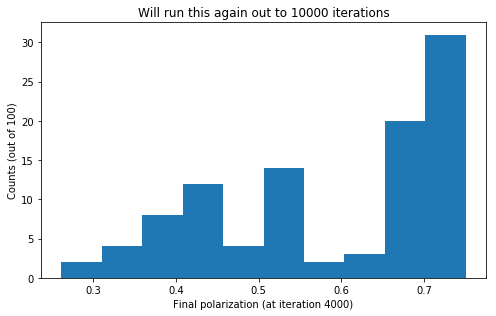

In [68]:
import h5py

with h5py.File('test_rerun_100.hdf', 'r') as hdf:
    plt.figure(figsize=(7, 4.5))
    plt.hist(hdf['connected caveman/polarization'][:, -1])
    plt.xlabel('Final polarization (at iteration 4000)')
    plt.ylabel('Counts (out of 100)')
    plt.title('Will run this again out to 10000 iterations')
    plt.savefig('reports/Figures/caveman-highpol-histogram.pdf')

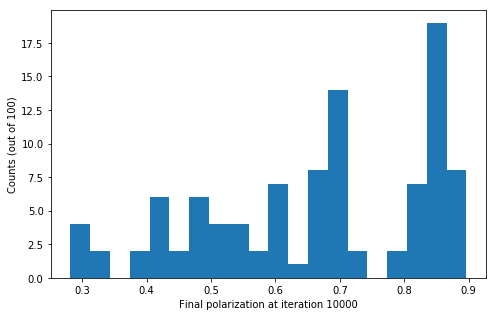

In [86]:
import h5py

with h5py.File('final_rerun_K=2.hdf', 'r') as hdf:

    plt.figure(figsize=(7, 4.5))
    
    plt.hist(hdf['connected caveman/polarization'][:, -1], bins=20)
    
    plt.xlabel('Final polarization at iteration 10000')
    plt.ylabel('Counts (out of 100)')
#     plt.xticks(np.arange(0.2, 0.71, 0.1))

    plt.savefig('reports/Figures/caveman-highpol-histogram-10k-its.pdf')

## Parallel coordinate plots to visualize system evolution

I want to be able to compare the dynamics of different runs. In the above histogram, for example, what happens in the run that results in a final polarization of 0.2, compared with the trial that ended closer to a final polarization of 0.8? In 2D we could just make a scatterplot of the system at different iterations. The coordinates at different times are saved in the HDF saved from `persist_experiments`. They are not saved at every timestep, but instead at every `n_iter_sync` timesteps. This is stored in the HDF metadata.

In [87]:
with h5py.File('final_rerun_K=2.hdf', 'r') as hdf:
    print(list(hdf.attrs.keys()))

['K', 'distance metric']


OK, so for this one it is not saved. I'm not sure why that is, but it needs to be fixed. Luckily I know that I ran the simulations for 10k iterations and I can see how long the coordinate history is.

In [88]:
with h5py.File('final_rerun_K=2.hdf', 'r') as hdf:
    coords_hist = hdf['connected caveman/coords']
    print(coords_hist.shape)

(100, 11, 100, 2)


So there are five, which implies that coordinates were saved every 2000 iterations. This is not as fine scale as I would like, but perhaps it will be good enough. First, let's find the trial that had the maximum and minimum final polarizations

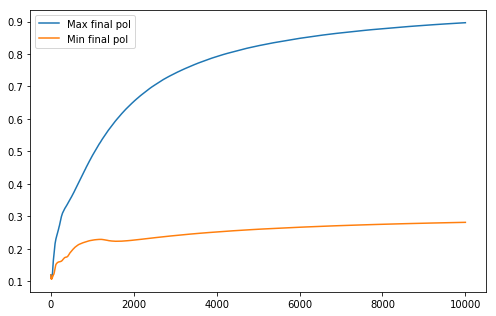

In [84]:
ccpath = 'connected caveman/'
with h5py.File('final_rerun_K=2.hdf', 'r') as hdf:
    pol = hdf[ccpath + 'polarization']
    finals = pol[:, -1]
    max_idx = np.argmax(finals)
    min_idx = np.argmin(finals)
    fig, ax = plt.subplots(figsize=(7, 4.5))
    ax.plot(pol[max_idx], label='Max final pol')
    ax.plot(pol[min_idx], label='Min final pol')
    ax.legend()

So the `n_iter_sync` must have been 1000. There's one for 0, 1k, ..., 10k for a total of 11. Let's make a `pandas.DataFrame` and plot these parallel. But first, just going to make scatterplots for this 2D. Possibly going to build up development to parallel coords in paper this way.

In [179]:
with h5py.File('final_rerun_K=2_coolmin.hdf') as hdf:
    coords_hist = hdf['connected caveman/coords'][:]
    min_idx = hdf['connected caveman/polarization'][:, -1].argmin()
    max_idx = hdf['connected caveman/polarization'][:, -1].argmax()
print(coords_hist.shape)

min_coords = coords_hist[min_idx]
max_coords = coords_hist[max_idx]
print(max_coords.shape)
print(min_coords.shape)

(100, 11, 100, 2)
(11, 100, 2)
(11, 100, 2)


Text(0.5,1,'t=10000')

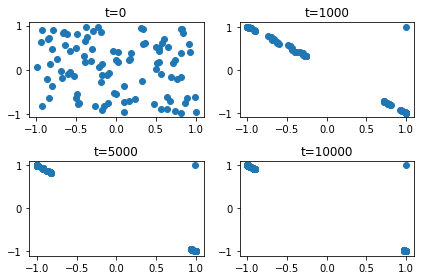

In [180]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(max_coords[0, :, 0], max_coords[0, :, 1], 'o')
axes[0, 0].set_title('t=0')
axes[0, 1].plot(max_coords[1, :, 0], max_coords[1, :, 1], 'o')
axes[0, 1].set_title('t=1000')
axes[1, 0].plot(max_coords[5, :, 0], max_coords[5, :, 1], 'o')
axes[1, 0].set_title('t=5000')
axes[1, 1].plot(max_coords[10, :, 0], max_coords[10, :, 1], 'o')
axes[1, 1].set_title('t=10000')

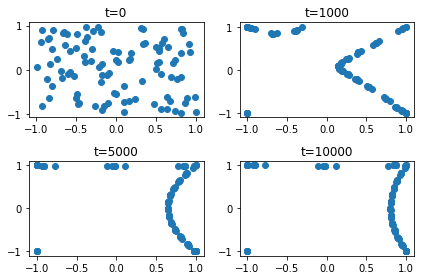

In [182]:
idx = 0
snapshot_indexes = [0, 1, 5, 10]
fig, axes = plt.subplots(2, 2)

for i in range(2):
    for j in range(2):
        snap_idx = snapshot_indexes[idx]
        axes[i, j].plot(min_coords[snap_idx, :, 0], 
                        min_coords[snap_idx, :, 1], 'o')
        axes[i, j].set_title('t={}'.format(snap_idx * 1000))
        idx += 1

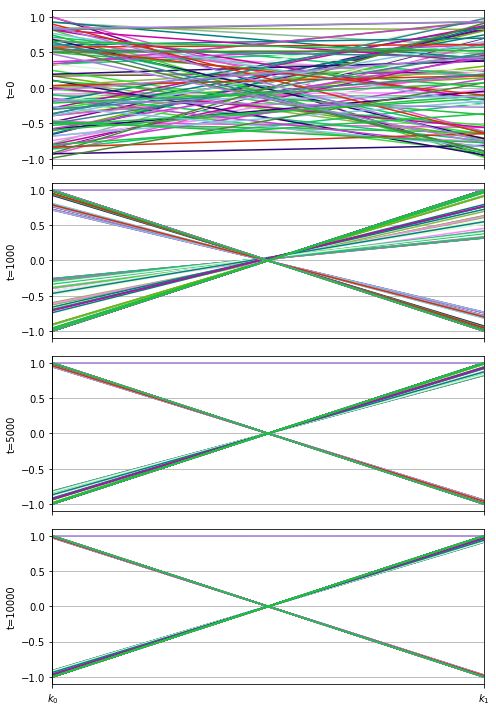

In [102]:
fig, axes = plt.subplots(4, sharex=True, figsize=(7, 10))
snapshot_indexes = [0, 1, 5, 10]
n_caves = 20; n_per_cave = 5
cave_indexes = [(i//n_per_cave) + 1 
                for i in range(n_caves * n_per_cave)]
for idx, snap_idx in enumerate(snapshot_indexes):
    
    ax = axes[idx]
    
    df = pd.DataFrame({
        r'$k_{}$'.format(i): max_coords[snap_idx, :, i]
        for i in range(2)
    })
    df['Cave Index'] = cave_indexes
    
    parallel_coordinates(df, class_column='Cave Index', ax=ax)
    
    ax.set_ylabel('t={}'.format(snap_idx * 1000))
    ax.legend_.remove()

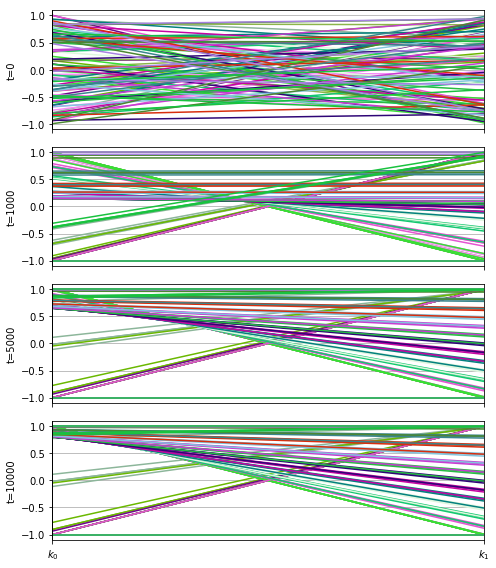

In [105]:
# Now do the same thing but for the min condition
fig, axes = plt.subplots(4, sharex=True, figsize=(7, 8))
snapshot_indexes = [0, 1, 5, 10]
n_caves = 20; n_per_cave = 5
cave_indexes = [(i//n_per_cave) + 1 
                for i in range(n_caves * n_per_cave)]
for idx, snap_idx in enumerate(snapshot_indexes):
    
    ax = axes[idx]
    
    df = pd.DataFrame({
        r'$k_{}$'.format(i): min_coords[snap_idx, :, i]
        for i in range(2)
    })
    df['Cave Index'] = cave_indexes
    
    parallel_coordinates(df, class_column='Cave Index', ax=ax)
    
    ax.set_ylabel('t={}'.format(snap_idx * 1000))
    ax.legend_.remove()
plt.savefig('min_parallel_K=2.pdf')

   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


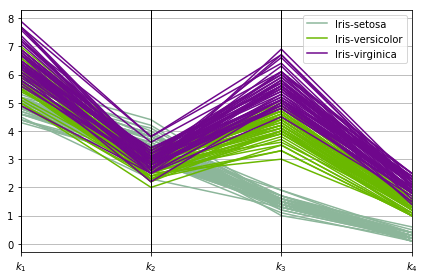

In [92]:
from pandas.plotting import parallel_coordinates
# Load iris data as an example to follow.
url = 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv'
df = pd.read_csv(url)
print(df.head())
# as we'll use in ours
df.columns = [r'$k_{}$'.format(i+1) for i in range(4)] + ['Name']
parallel_coordinates(df, class_column='Name')

In [113]:
with h5py.File('data/final_rerun_K=3.hdf') as hdf:
    coords_hist = hdf['connected caveman/coords'][:]
    max_idx = hdf['connected caveman/polarization'][:, -1].argmax()
    min_idx = hdf['connected caveman/polarization'][:, -1].argmin()
print(coords_hist.shape)

min_coords = coords_hist[min_idx]
max_coords = coords_hist[max_idx]

(100, 101, 100, 3)


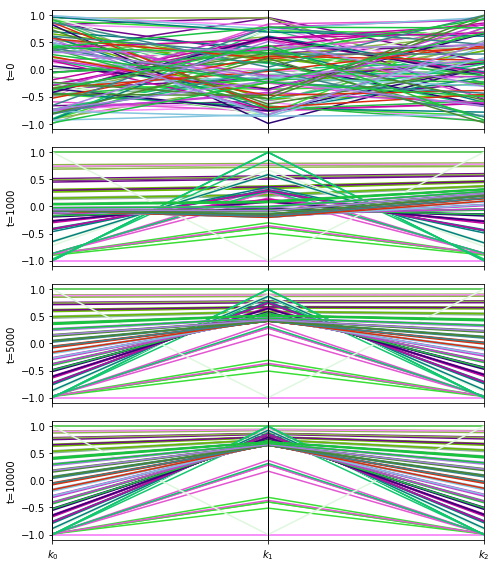

In [154]:
# Now do the same thing but for the min condition
fig, axes = plt.subplots(4, sharex=True, figsize=(7, 8))
snapshot_indexes = [0, 10, 50, 100]
n_caves = 20; n_per_cave = 5
cave_indexes = [(i//n_per_cave) + 1 
                for i in range(n_caves * n_per_cave)]

K = len(min_coords[0,0])

for idx, snap_idx in enumerate(snapshot_indexes):
    
    ax = axes[idx]
    
    df = pd.DataFrame({
        r'$k_{}$'.format(i): min_coords[snap_idx, :, i]
        for i in range(K)
    })
    df['Cave Index'] = cave_indexes
    
    parallel_coordinates(df, class_column='Cave Index', ax=ax)
    
    ax.set_ylabel('t={}'.format(snap_idx * 100))
    ax.legend_.remove()
    ax.grid(False)
# plt.savefig('min_parallel_K=3.pdf')

(100, 3)


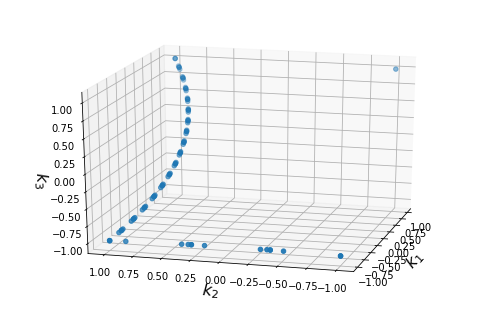

In [151]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 4.5))
ax = fig.add_subplot(111, projection='3d')

final_tstep = min_coords[-1]
print(final_tstep.shape)
ax.scatter(final_tstep[:, 0], final_tstep[:, 1], final_tstep[:, 2], 
           marker='o')
ax.set_xlabel(r'$k_1$', fontsize=16)
ax.set_ylabel(r'$k_2$', fontsize=16)
ax.set_zlabel(r'$k_3$', fontsize=16)
ax.view_init(20, -165)

# plt.savefig('reports/Figures/K=3_3D_min.pdf')

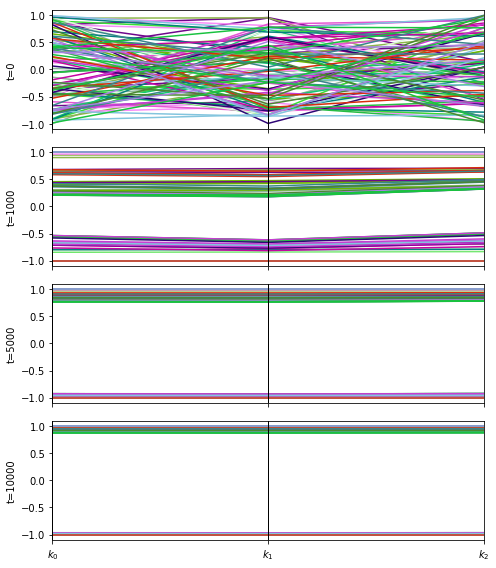

In [153]:
# Now do the same thing but for the min condition
fig, axes = plt.subplots(4, sharex=True, figsize=(7, 8))
snapshot_indexes = [0, 10, 50, 100]
n_caves = 20; n_per_cave = 5
cave_indexes = [(i//n_per_cave) + 1 
                for i in range(n_caves * n_per_cave)]

K = len(min_coords[0,0])

for idx, snap_idx in enumerate(snapshot_indexes):
    
    ax = axes[idx]
    
    df = pd.DataFrame({
        r'$k_{}$'.format(i): max_coords[snap_idx, :, i]
        for i in range(K)
    })
    df['Cave Index'] = cave_indexes
    
    parallel_coordinates(df, class_column='Cave Index', ax=ax)
    
    ax.set_ylabel('t={}'.format(snap_idx * 100))
    ax.legend_.remove()
    ax.grid(False)
    
# plt.savefig('max_parallel_K=3.pdf')

(100, 3)


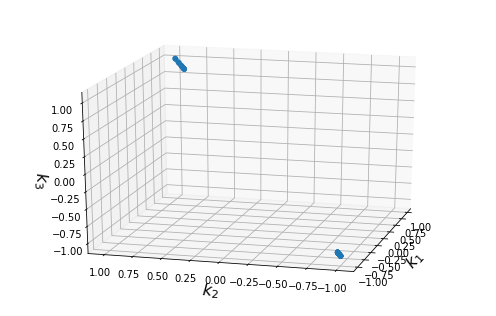

In [152]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 4.5))
ax = fig.add_subplot(111, projection='3d')

final_tstep = max_coords[-1]
print(final_tstep.shape)
ax.scatter(final_tstep[:, 0], final_tstep[:, 1], final_tstep[:, 2], 
           marker='o')
ax.set_xlabel(r'$k_1$', fontsize=16)
ax.set_ylabel(r'$k_2$', fontsize=16)
ax.set_zlabel(r'$k_3$', fontsize=16)
ax.view_init(20, -165)

plt.savefig('reports/Figures/K=3_3D_max.pdf')

In [155]:
with h5py.File('data/final_rerun_K=5.hdf') as hdf:
    coords_hist = hdf['connected caveman/coords'][:]
    max_idx = hdf['connected caveman/polarization'][:, -1].argmax()
    min_idx = hdf['connected caveman/polarization'][:, -1].argmin()
print(coords_hist.shape)

min_coords = coords_hist[min_idx]
max_coords = coords_hist[max_idx]

(100, 101, 100, 5)


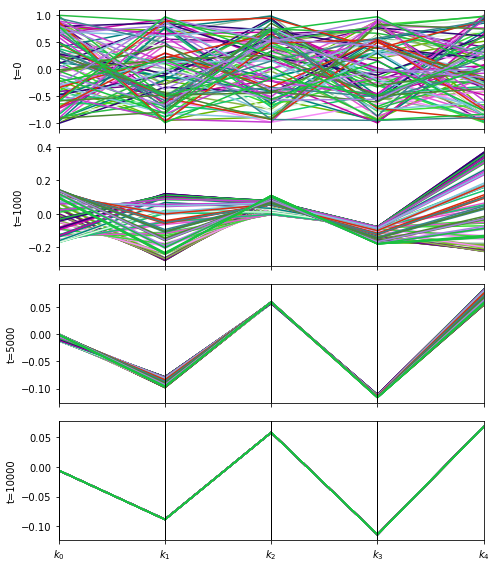

In [156]:
# Now do the same thing but for the min condition
fig, axes = plt.subplots(4, sharex=True, figsize=(7, 8))
snapshot_indexes = [0, 10, 50, 100]
n_caves = 20; n_per_cave = 5
cave_indexes = [(i//n_per_cave) + 1 
                for i in range(n_caves * n_per_cave)]

K = len(min_coords[0,0])

for idx, snap_idx in enumerate(snapshot_indexes):
    
    ax = axes[idx]
    
    df = pd.DataFrame({
        r'$k_{}$'.format(i): min_coords[snap_idx, :, i]
        for i in range(K)
    })
    df['Cave Index'] = cave_indexes
    
    parallel_coordinates(df, class_column='Cave Index', ax=ax)
    
    ax.set_ylabel('t={}'.format(snap_idx * 100))
    ax.legend_.remove()
    ax.grid(False)
plt.savefig('min_parallel_K=5.pdf')

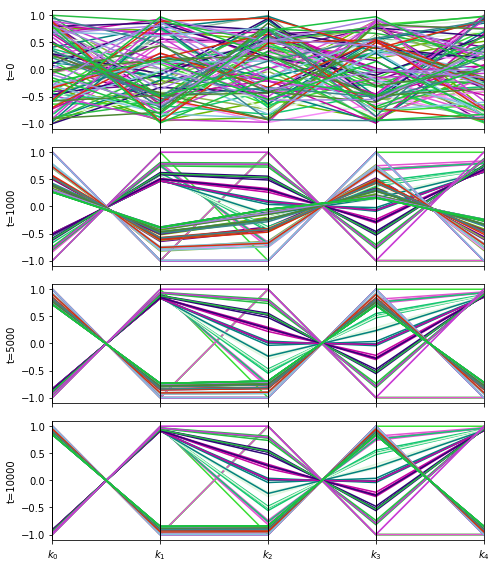

In [157]:
# Now do the same thing but for the min condition
fig, axes = plt.subplots(4, sharex=True, figsize=(7, 8))
snapshot_indexes = [0, 10, 50, 100]
n_caves = 20; n_per_cave = 5
cave_indexes = [(i//n_per_cave) + 1 
                for i in range(n_caves * n_per_cave)]

K = len(min_coords[0,0])

for idx, snap_idx in enumerate(snapshot_indexes):
    
    ax = axes[idx]
    
    df = pd.DataFrame({
        r'$k_{}$'.format(i): max_coords[snap_idx, :, i]
        for i in range(K)
    })
    df['Cave Index'] = cave_indexes
    
    parallel_coordinates(df, class_column='Cave Index', ax=ax)
    
    ax.set_ylabel('t={}'.format(snap_idx * 100))
    ax.legend_.remove()
    ax.grid(False)
    
plt.savefig('max_parallel_K=5.pdf')

(100, 101, 100, 2)
(101, 100, 2)
(101, 100, 2)


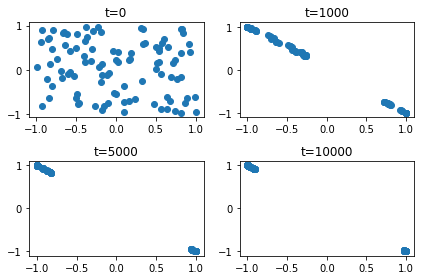

In [167]:
with h5py.File('data/final_rerun_K=2.hdf') as hdf:
    coords_hist = hdf['connected caveman/coords'][:]
    max_idx = hdf['connected caveman/polarization'][:, -1].argmax()
    min_idx = hdf['connected caveman/polarization'][:, -1].argmin()
    final_pol = hdf['connected caveman/polarization'][:, -1]
    max_final_pol = final_pol[max_idx]
    min_final_pol = final_pol[min_idx]
    
print(coords_hist.shape)
min_coords = coords_hist[min_idx]
max_coords = coords_hist[max_idx]
print(max_coords.shape)
print(min_coords.shape)

idx = 0
snap_idx = [0, 10, 50, 100]
fig, axes = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        snap_idx = snapshot_indexes[idx]
        axes[i, j].plot(max_coords[snap_idx, :, 0], 
                        max_coords[snap_idx, :, 1], 'o')
        axes[i, j].set_title('t={}'.format(snap_idx * 100))
        idx += 1

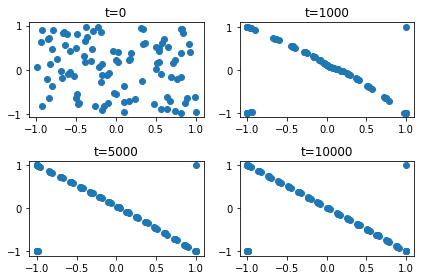

In [164]:
idx = 0
snap_idx = [0, 10, 50, 100]
fig, axes = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        snap_idx = snapshot_indexes[idx]
        axes[i, j].plot(min_coords[snap_idx, :, 0], 
                        min_coords[snap_idx, :, 1], 'o')
        axes[i, j].set_title('t={}'.format(snap_idx * 100))
        idx += 1

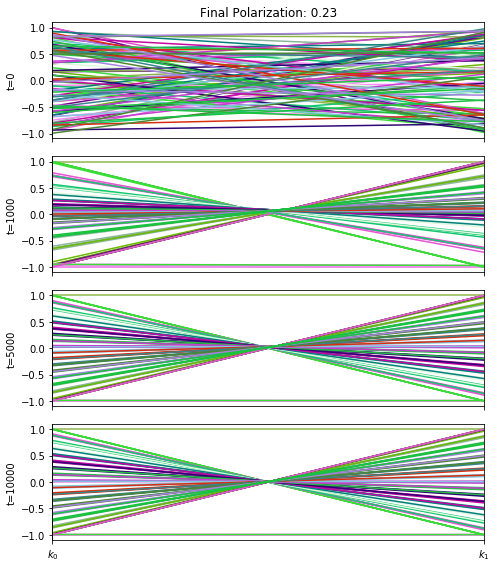

In [172]:
fig, axes = plt.subplots(4, sharex=True, figsize=(7, 8))
snapshot_indexes = [0, 10, 50, 100]
n_caves = 20; n_per_cave = 5
cave_indexes = [(i//n_per_cave) + 1 
                for i in range(n_caves * n_per_cave)]

K = len(min_coords[0,0])

for idx, snap_idx in enumerate(snapshot_indexes):
    
    ax = axes[idx]
    
    df = pd.DataFrame({
        r'$k_{}$'.format(i): min_coords[snap_idx, :, i]
        for i in range(K)
    })
    df['Cave Index'] = cave_indexes
    
    parallel_coordinates(df, class_column='Cave Index', ax=ax)
    
    ax.set_ylabel('t={}'.format(snap_idx * 100))
    ax.legend_.remove()
    ax.grid(False)

axes[0].set_title('Final Polarization: {:.2f}'.format(min_final_pol));
plt.savefig('min_parallel_K=2.pdf')

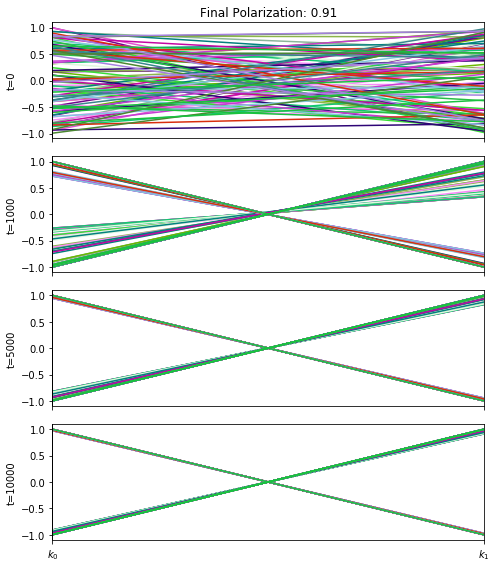

In [171]:
fig, axes = plt.subplots(4, sharex=True, figsize=(7, 8))
snapshot_indexes = [0, 10, 50, 100]
n_caves = 20; n_per_cave = 5
cave_indexes = [(i//n_per_cave) + 1 
                for i in range(n_caves * n_per_cave)]

K = len(min_coords[0,0])

for idx, snap_idx in enumerate(snapshot_indexes):
    
    ax = axes[idx]
    
    df = pd.DataFrame({
        r'$k_{}$'.format(i): max_coords[snap_idx, :, i]
        for i in range(K)
    })
    df['Cave Index'] = cave_indexes
    
    parallel_coordinates(df, class_column='Cave Index', ax=ax)
    
    ax.set_ylabel('t={}'.format(snap_idx * 100))
    ax.legend_.remove()
    ax.grid(False)
    
axes[0].set_title('Final Polarization: {:.2f}'.format(max_final_pol));
plt.savefig('max_parallel_K=2.pdf')